In [ ]:
from cellmech import *
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# open microfscopic image of cell and convert it into matrix
image_matrix = np.array(Image.open('images/cell_boundary/img2.png').convert('L'))
image_dim = np.shape(image_matrix)

# define all the parameters that are required to calculata traction forces
cellmechparams = CellMechParameters({
    "p" : 0.5,
    "E" : 10e3,
    "pi" : np.pi,
    "N" : 20,
    "width" :2,
    "pixel_size" : 1e-7 
})

'''
first we will a dummy force field using known function (symmetric gausian) to calcualte displacement field, then we will 
use generated dispclement field to retrieve original force field so see if calculations match 
'''

# force_points, updated_image = detect_shapes(image_matrix, detection_threshold = 0.7)
force_points, updated_image = detect_shapes_deprecated(image_matrix, detection_threshold = 0.7)

np.save('force_points.npy', np.array(force_points))
saved = np.load('force_points.npy')
# calculation of force field using gaussian
force_field  = calculate_dummy_force(force_points, cellmechparams)

x_axis = np.linspace(-1, 1, updated_image.shape[0])
y_axis = np.linspace(-1, 1, updated_image.shape[1])

central point of all forces [-0.04861111  0.13235294]
U force [ 0.60961955 -0.79269415], point : [-0.44444444  0.64705882]
U force [ 0.57185905 -0.82035189], point : [-0.40740741  0.64705882]
U force [ 0.53007959 -0.84794789], point : [-0.37037037  0.64705882]
U force [ 0.48405007 -0.8750403 ], point : [-0.33333333  0.64705882]
U force [ 0.43362209 -0.90109483], point : [-0.2962963   0.64705882]
U force [ 0.37876631 -0.92549235], point : [-0.25925926  0.64705882]
U force [ 0.6731891  -0.73947038], point : [-0.48148148  0.60784314]
U force [ 0.34297388 -0.93934494], point : [-0.22222222  0.60784314]
U force [ 0.2760659  -0.96113871], point : [-0.18518519  0.60784314]
U force [ 0.14181063 -0.98989381], point : [-0.11111111  0.56862745]
U force [ 0.05826539 -0.99830113], point : [-0.07407407  0.56862745]
U force [ 0.76383107 -0.64541622], point : [-0.51851852  0.52941176]
U force [-0.12152066 -0.9925889 ], point : [0.         0.52941176]
U force [ 0.79557987 -0.60584871], point : [-0.5185

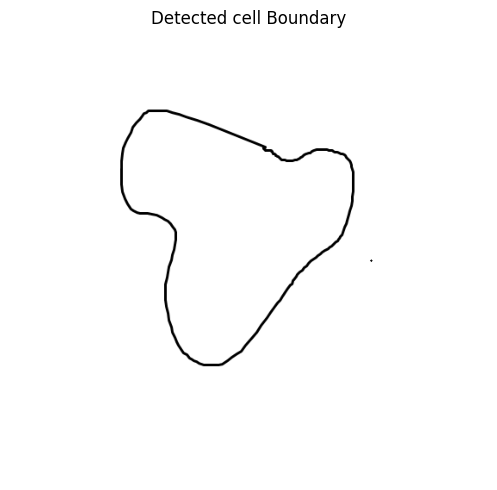

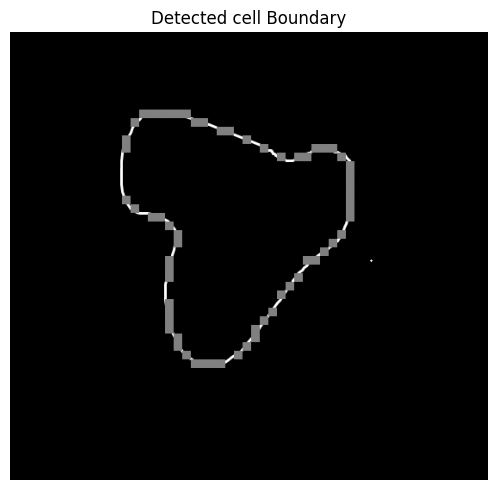

In [2]:
plot_results(image_matrix)
plot_results(updated_image)
# plt.plot(force_points[:,0], force_points[:,1])
# plt.title("Cell boundary and force points")

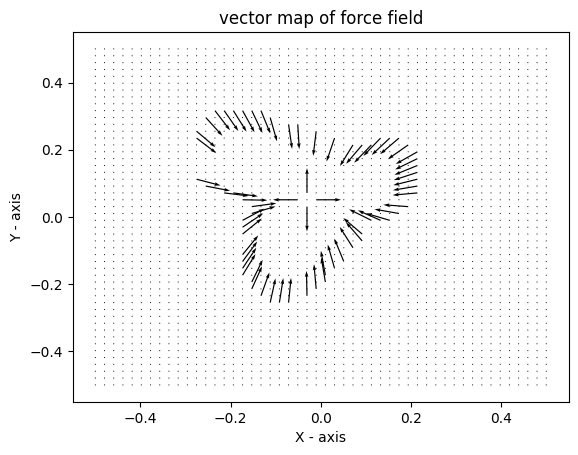

In [3]:
# visualzation of force of displacement using FTTC and tensor network contraction
# print(force_field)
fig = plot_vector_field(force_field, "vector map of force field")

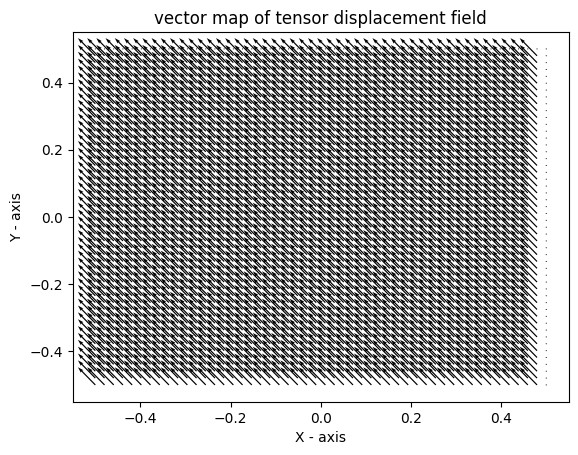

In [4]:
# calculation of displacement using FTTC and tensor network contraction
displacement = calcualte_displacement(force_field, cellmechparams, "tn")

fig = plot_vector_field(displacement, "vector map of tensor displacement field")

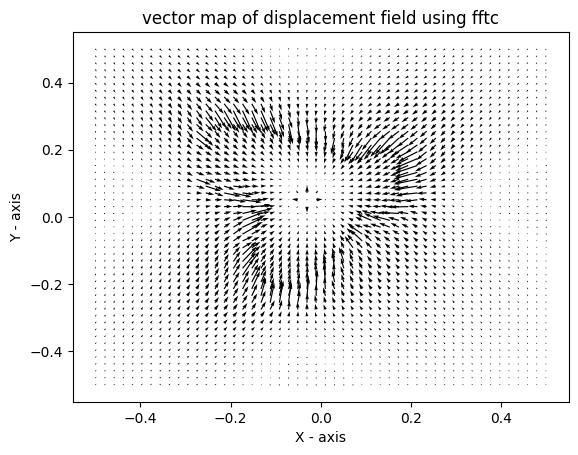

In [5]:
displacement = calcualte_displacement(force_field, cellmechparams)
fig = plot_vector_field(displacement, "vector map of displacement field using fftc")

Text(0.5, 1.0, 'Absolute displacement')

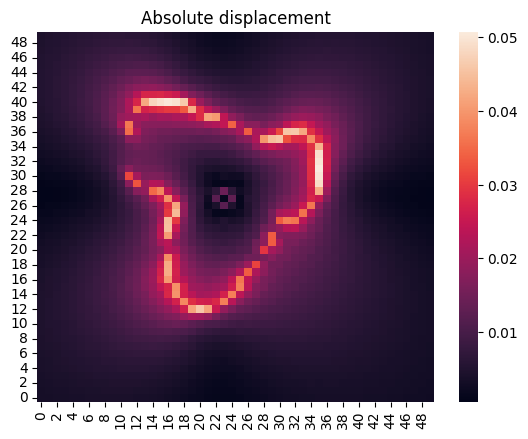

In [6]:

fmag = np.sqrt(displacement[:,:,0]**2 + displacement[:,:,1]**2)
ax = sns.heatmap(np.transpose(fmag))
ax.invert_yaxis()
plt.title("Absolute displacement")

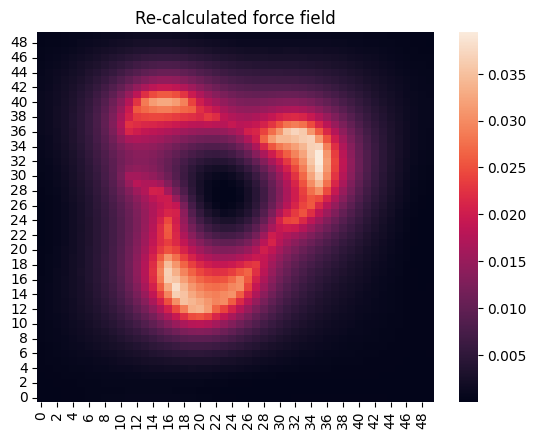

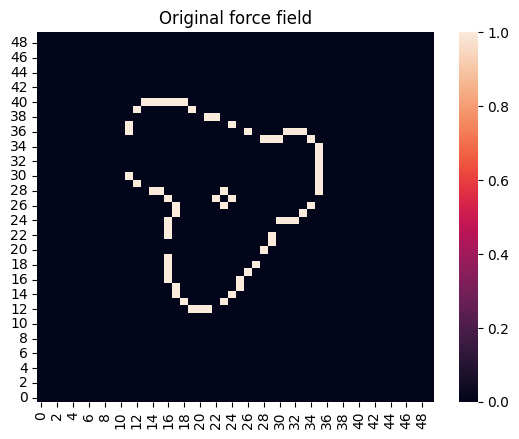

percentage error :  6277.771473098143 %


In [7]:
'''
Now to back calculate force field from displacement field
'''

recalc_force_field = calculate_traction_force(displacement, cellmechparams)

fmag = recalc_force_field[:,:,0]**2 + recalc_force_field[:,:,1]**2
ax = sns.heatmap(np.transpose(fmag))
ax.invert_yaxis()
plt.title("Re-calculated force field")
plt.show()

force_field_mag = force_field[:,:,0]**2 + force_field[:,:,1]**2
recalc_force_field_mag = recalc_force_field[:,:,0]**2 + recalc_force_field[:,:,1]**2

fmag = force_field[:,:,0]**2 + force_field[:,:,1]**2
ax = sns.heatmap(np.transpose(fmag))
ax.invert_yaxis()
plt.title("Original force field")
plt.show()

#  re-scaling of force magnitude values (note the denominator is same for both re-calculated and original)
force_field_max_mag = np.max(force_field_mag)
force_field_mag = force_field_mag/force_field_max_mag
recalc_force_field_mag = recalc_force_field_mag/force_field_max_mag
np.save('force_field.npy', force_field_mag)
print("percentage error : ", 100*np.sum((force_field_mag - recalc_force_field_mag)**2), "%")